# Introdução

## 📘 Sobre este Estudo

Este notebook foi elaborado com fins **didáticos e demonstrativos** para mostrar como aplicar técnicas de **inferência estatística**, utilizando tanto métodos **clássicos (paramétricos)** quanto **computacionais** (como bootstrap e testes de aleatorização).

---

## 🛒 Contexto do Problema

A empresa fictícia **RetailX**, uma varejista digital, lançou uma campanha para testar o impacto de diferentes estratégias promocionais sobre o comportamento de seus clientes. A empresa está especialmente interessada em entender:

- Se as campanhas aumentam o engajamento no site
- Se as campanhas influenciam a taxa de conversão (compra)
- Se há impacto no valor total gasto

Para isso, um experimento foi conduzido com **quatro grupos de clientes**, atribuídos aleatoriamente.

---

## 🎯 Objetivo do Estudo

Avaliar se **diferentes tipos de campanha** geram **diferenças estatisticamente significativas** em:
- Taxa de conversão (realizou compra ou não)
- Valor de compra (gasto em reais)
- Número de visitas ao site (antes e depois da campanha)
---

## 🧾 Descrição das Variáveis

| Variável            | Tipo        | Descrição                                                                 |
|---------------------|-------------|---------------------------------------------------------------------------|
| `grupo`             | Categórica  | **Campanha recebida pelo cliente**:<br>• `A`: grupo **controle** (não recebeu estímulo)<br>• `B`: cupom de desconto<br>• `C`: frete grátis<br>• `D`: cashback |
| `evento`            | Binária     | Indicador de conversão: o cliente **realizou uma compra?** (`1` = sim, `0` = não) |
| `score`             | Contínua    | Valor total gasto pelo cliente (em reais) durante o período da campanha  |
| `pre_treinamento`   | Contínua    | Número de visitas ao site **antes da campanha**                           |
| `pos_treinamento`   | Contínua    | Número de visitas ao site **após a campanha**                             |

---

## 🧠 O que significa “grupo controle”?

O grupo **controle** (`grupo = A`) é formado por clientes que **não receberam nenhuma campanha promocional**. Esse grupo serve como **referência neutra**, permitindo que possamos comparar com os demais grupos e **isolar o efeito da campanha**.

> Exemplo: Se o grupo B (cupom) tiver maior conversão do que o grupo A (controle), é possível afirmar com maior confiança que o cupom teve impacto real — desde que a diferença seja estatisticamente significativa.

---

## ✅ Instruções de Análise

Para cada uma das perguntas a seguir, faça quando aplicável:

1. **Construa um intervalo de confiança de 95% para estimar a variabilidade da estatística obtida.**  
2. **Interprete corretamente o intervalo de confiança obtido** e o que ele indica sobre a estimativa.  
3. **Formule as hipóteses nula (H₀) e alternativa (Hₐ)** com base no problema proposto.  
4. **Escolha o teste estatístico adequado**, considerando se o método será paramétrico ou computacional.  
5. **Calcule a estatística de teste e o valor-p correspondente**, adotando um nível de significância de 5%.  
6. **Analise o resultado no contexto de negócios:** o efeito observado parece real ou pode ser atribuído ao acaso?

---


# Análises

In [1]:
# SETUP
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, t, f

In [2]:
# LOAD: A base já está sanitizada.
base = pd.read_excel("dados/base_retailx.xlsx")
base.head()

,grupo,evento,score,pre_treinamento,pos_treinamento
0,A,0,0.00,6,6
1,A,1,70.68,4,4
2,A,1,60.23,6,6
3,A,1,102.16,8,8
4,A,0,0.00,1,2


In [3]:
# Quantidade de amostras
base.shape[0]

300

## 🔹 1. Intervalo de Confiança para Proporção

> Construa um intervalo de confiança de 95% para estimar a proporção de clientes que realizaram compra.

In [4]:
# Amostra
X = base["evento"].values
n = X.shape[0] # Tamanho da amostra

# Proporção observada de clientes que realizaram alguma compra
p_obs = X.mean()
print(f"p_obs = {np.round(p_obs,2)}")

p_obs = 0.57


### 💻 Computacional

#### Bootstrap: 

Técnica utilizada para aproximar a variabilidade populacional de um parâmetro de interesse, a partir da distribuição amostral obtida via reamostragem com reposição sobre uma única amostra disponível.
A distribuição bootstrap é centrada na estatística observada na amostra original e permite, por exemplo, a construção de intervalos de confiança ou avaliação da incerteza da estimativa.

In [5]:
# BOOTSTRAP

# Reamostragem
n_simu = 10_000 # 10 mil simulações
stat_dist = []

for _ in range(n_simu):

    # Reamostra
    X_boot = np.random.choice(X, size=n, replace=True)

    # Estatistica
    p_boot = X_boot.mean()
    stat_dist.append(p_boot)


# Calcular os percentis
gama = 95
stat_dist = np.array(stat_dist)
percentile_l = np.percentile(stat_dist, (100 - gama)/2)
percentile_r = np.percentile(stat_dist, gama + (100 - gama)/2)

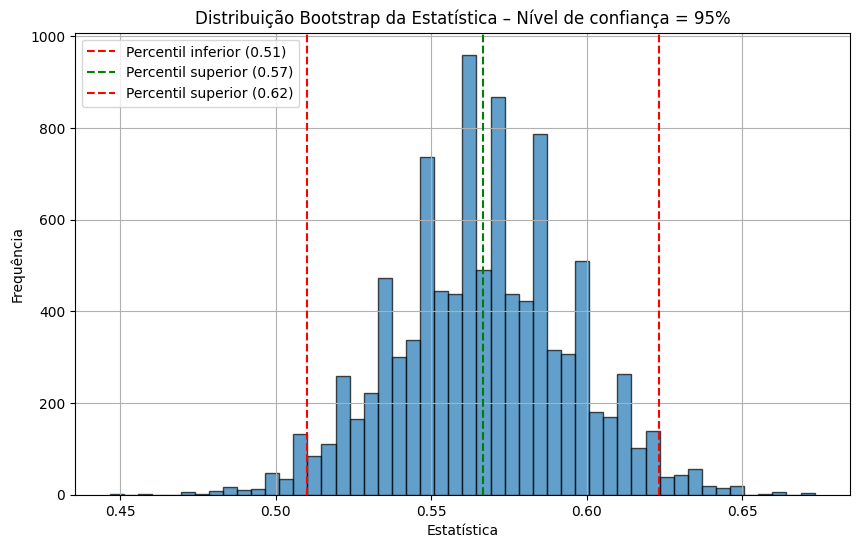

In [6]:
# Plotar histograma da distribuição bootstrap
plt.figure(figsize=(10, 6))
plt.hist(stat_dist, bins=50, edgecolor='black', alpha=0.7)

# Linhas 
plt.axvline(percentile_l, color='red', linestyle='--', label=f'Percentil inferior ({percentile_l:.2f})') # Percentil inferior
plt.axvline(p_obs, color='green', linestyle='--', label=f'Percentil superior ({p_obs:.2f})')             # Valor observado
plt.axvline(percentile_r, color='red', linestyle='--', label=f'Percentil superior ({percentile_r:.2f})') # Percentil superior

# Título e rótulos
plt.title(f'Distribuição Bootstrap da Estatística – Nível de confiança = {gama}%')
plt.xlabel('Estatística')
plt.ylabel('Frequência')
plt.legend()
plt.grid(True)
plt.show()

**Interpretação do Intervalo obtido:**
- Podemos afirmar com 95% de confiança que o verdadeiro valor do parâmetro populacional está entre os percentis inferior e superior do intervalo de confiança construído, conforme indicado no histograma acima.

- Importante: essa confiança não deve ser interpretada como a probabilidade de o parâmetro estar dentro deste intervalo específico, mas sim da seguinte forma:
    > Se este mesmo experimento (coletar outras amostras sob as mesmas condições) fosse repetido muitas vezes, e em cada repetição fosse construído um intervalo de confiança da mesma forma, então aproximadamente 95% desses intervalos conteriam o verdadeiro valor do parâmetro populacional.
    > Portanto, com base na confiança que temos no processo de construção do intervalo, estamos 95% confiantes de que este intervalo específico contém o valor verdadeiro do parâmetro.

### 📊 Modelo Estatístico

Suposições que devem ser atendidas:
- A variável observada é binária: 0-Fracasso |1-Sucesso
- As observações são independentes (o valor de uma observação não influência na outra)
- Mesma distribuição para todas as observações -> probabilidade de sucesso é constante.
- O número de observações é fixo e conhecido
- No caso de aproximar pela normal: np >= 10 e n(1-p) >=10

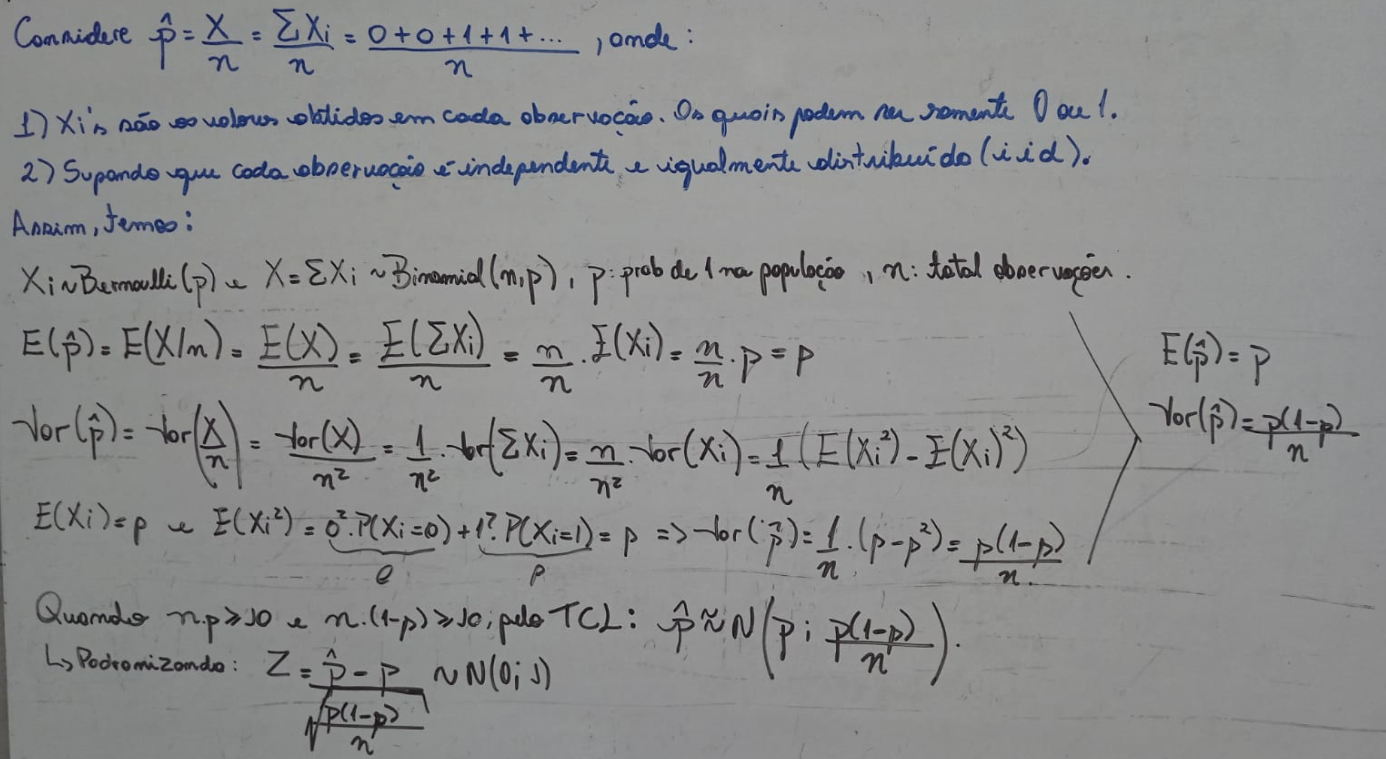

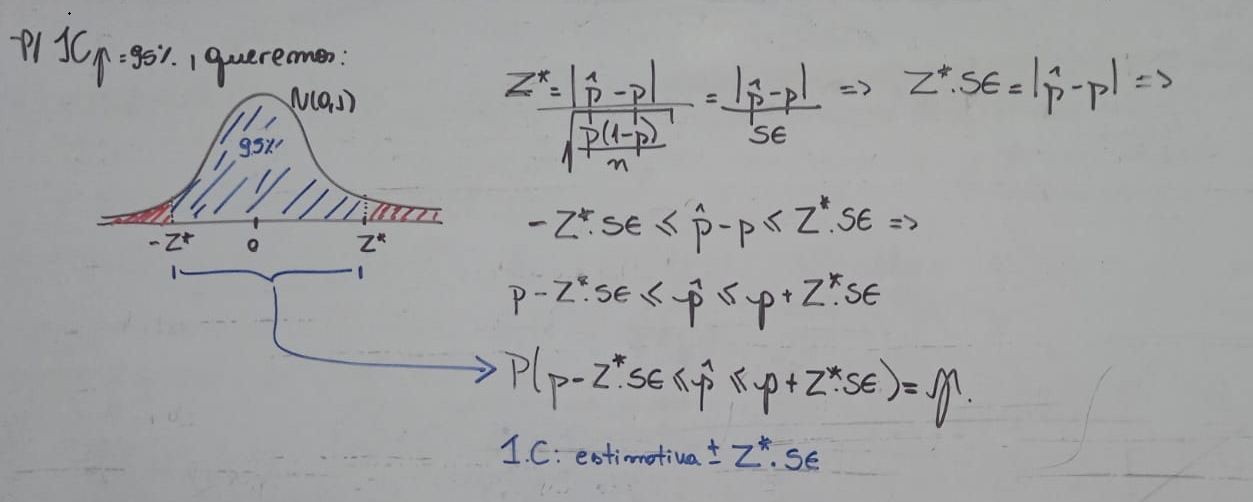

In [7]:
# Melhor estimativa para p
p = p_obs      

# Avaliando condições para aproximar pela normal
print(f"np = {n*p} >= 10 OK")
print(f"n(1-p) = {n*(1-p)} >= 10 OK")

np = 170.0 >= 10 OK
n(1-p) = 130.0 >= 10 OK


In [8]:
# Obtendo valor crítico na distribuição normal padrão
Z = norm.ppf(0.975)
print(f"Z = {Z}")

Z = 1.959963984540054


In [9]:
# Obtendo o erro padrão da estatística (desvio padrão da distribuição da estatística)
SE = np.sqrt(p*(1-p)/n)
print(f"SE = {SE}")

SE = 0.02860976264351941


In [10]:
# Obtendo o IC
l0 = p - Z*SE
l1 = p + Z*SE
print(f"IC_95 = [{np.round(l0, 2)}: {np.round(l1, 2)}]")

IC_95 = [0.51: 0.62]


In [11]:
# Obtendo o IC sem usar a padronização
print(f"IC_95 = [{np.round(norm.ppf(0.025, loc=p, scale=SE), 2)}: {np.round(norm.ppf(0.975, loc = p, scale=SE), 2)}]")

IC_95 = [0.51: 0.62]


O que fizemos foi selecionar 95% dos dados centrais da distribuição amostral da estatística de interesse, a qual foi aproximada por uma distribuição normal, centrada em p_obs.

## 🔹 2. Teste de Hipótese para Proporção

> A taxa de conversão geral (proporção de clientes que compraram) é maior que 50%?

### 💻 Computacional

### 📊 Modelo Estatístico



## 🔹 3. Intervalo de Confiança para Diferença entre Proporções (grupos D e B)

> Construa um intervalo de confiança de 95% para estimar a diferença na taxa de conversão entre os grupos D e B.

## 🔹 4. Teste de Hipótese para Diferença entre Proporções

> A taxa de conversão no grupo D (cashback) é maior do que no grupo B (cupom de desconto)?

## 🔹 3. Associação entre variáveis categóricas

> A taxa de conversão (`evento`) está associada ao tipo de campanha (`grupo`)?

## 🔹 5. Intervalo de Confiança para a Média Geral de Compras

> Construa um intervalo de confiança de 95% para estimar o valor médio de compra (`score`) de todos os clientes.

## 🔹 6. Teste de Hipótese para uma Média

> O valor médio de compra (`score`) de todos os clientes é maior que R$ 70?

## 🔹 7. Intervalo de Confiança para Diferença entre Médias (D vs. B)

> Construa um intervalo de confiança de 95% para estimar a diferença no valor médio de compra entre os grupos D e B.

## 🔹 8. Teste de Hipótese para Diferença entre Médias

> O grupo D gerou um valor médio de compra maior do que o grupo B?

## 🔹 9. Intervalo de Confiança para Diferença de Médias Pareadas

> Construa um intervalo de confiança de 95% para estimar o efeito da campanha na mudança de número de visitas (antes e depois).

## 🔹 10. Teste de Hipótese para Diferença de Médias Pareadas

> A campanha aumentou o número médio de visitas ao site por cliente?

## 🔹 11. Diferença entre 4 médias (ANOVA)

> Há diferenças significativas no valor médio de compra entre os quatro grupos de campanha (A, B, C, D)?

## 🔹 12. Pós-ANOVA (quem difere de quem?)

> Quais campanhas geraram resultados estatisticamente diferentes em termos de valor médio de compra?

# Referências
- https://openintro-ims.netlify.app/inference-one-prop